In [1]:
# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
pd.set_option('display.max_columns', 100) # Set Number of Columns to view

import numpy as np

# Statsmodels
import statsmodels.api as sm

In [2]:
# Load data
df = pd.read_csv('clean_data.csv')

In [3]:
# Correlation calculations
def corr_calculation(df, pairs, corr_method, value):
    '''
    Function to calculate correlation.
    Input
    df: dataframe, 
    pairs: tuple of pairs,
    corr_method: 'pearson' or 'kendall', 
    value: float between 0 and 1 to filter corr values
    '''
    count = 0
    for (r, f) in pairs:
        try:
            corr = df[r].corr(df[f], method = corr_method)
            if not '_Prgm_' in f and abs(corr) > value:
                print 'Correlation between "{}" and "{}" = {}'.format(r, f, corr)
                print '-----------------------------------------------------------------------------------------------'
        except TypeError as e:
            count += 1
            print '**********************************************************************************************'
            print 'Error count: "{}". "{}" and "{}" giving error: "{}"'.format(count, r, f, e)
            print '**********************************************************************************************'

In [4]:
print '# Rows: {}, and # Columns, {}'.format(df.shape[0], df.shape[1])

# Response variables, i.e. y
response = ['Annual_ResPPD_2013', 'Annual_EmpPPD_2013']

# Predictor variables or Features, i.e. x's
features = df.columns.tolist()

# Response-Predictor pairs
pairs = [(r, f) for r in response for f in features]

# Fill NaN with Median
temp = df
temp.fillna(temp.median(), inplace = True)

corr_calculation(temp, pairs, 'pearson', 0)

# Rows: 378, and # Columns, 374
**********************************************************************************************
Error count: "1". "Annual_ResPPD_2013" and "County" giving error: "unsupported operand type(s) for /: 'str' and 'int'"
**********************************************************************************************
**********************************************************************************************
Error count: "2". "Annual_ResPPD_2013" and "Jurisdiction" giving error: "unsupported operand type(s) for /: 'str' and 'int'"
**********************************************************************************************
Correlation between "Annual_ResPPD_2013" and "Num_RecyclingProg_2013" = -0.112582539479
-----------------------------------------------------------------------------------------------
Correlation between "Annual_ResPPD_2013" and "Target_ResPPD_2013" = 0.986763591082
-----------------------------------------------------------------------------

## Principal Components Analysis (PCA)

- PCA - In simple words it is a method of summarizing some data by finding best possible features. PCA looks for properties that show as much variation across the data as possible. PCA looks for features that allow to reconstruct original features as well as possible.
- PCA - Unsupervized learning technique
- Principal components are features that usefully explain variation in the data set
- PCA assumption - Features in data are correlated

![pca](images/pca.gif)
Ref: [Figure Source](http://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)

Suppose two features $x$ and $y$ are correlated. A new feature can be constructed by drawing a line through the center of the scatter plot and projecting all points onto this line (<font color=red>Red</font> dots are projections of the <font color=blue>Blue</font> dots).

PCA will find the "best" line according to two different criteria of what is the "best":  

1. ```The variation of values along this line should be maximal``` - Observe how the spread (variance) of the red dots  changes while the line rotates. Observe the position of black line when the variance is maximum.  
2. ```If we reconstruct the original two features (position of a blue dot), the reconstruction error will be given by the length of the connecting red line``` - Observe how the length of these red lines changes while the line rotates. Observe the position of black line when the total lenght of red lines reaches minimum.

The **maximum variance** and the **minimum error** are reached at the same time when the black line points to the magenta ticks. This line corresponds to the new feature that will be constructed by PCA

**Variance** - Measured as average squared distance from the center of the scatter plot to each red dot 

**Reconstruction Error** - Measured as the average squared length of the corresponding red lines.  The angle between red lines and black line is always **90 degrees**

The sum of these two quantities is equal to the average squared distance between the center of the scatter plot and each blue dot (Pythagoras theorem)

**Covariance matrix** - is a square symmetric matrix and it can be diagonalized by choosing a new orthogonal coordinate system given by its eigen vectors; corrosponding eigenvalues will then be located on the diagonal. In this new coordinate system covariance matrix is diagonal and looks like:

$$\left( \begin{array}{ccc}
ev_1 & 0 \\
0 & ev_2 \end{array} \right)$$

The correlation between points is zero. **The variance of any projection will be given by a weighted average of the eigenvalues.** <font color=steelblue>Eigenvalues represent the amount of variance explained by the features</font>

---
![ev](images/eigenvector.png)
**Eigenvector** - is a vector that maintains its direction after undergoing a linear transformation (Blue vector stayed the same)

**Eigenvalues** - is the scalar value that the eigenvector was multiplied by during the linear transformation (Values are how much the Eigenvectors grow or shrink)

In the left picture, two vectors are shown on the Mona Lisa. The picture then went under a linear transformation and is shown on the right. The **<font color=blue>Blue</font>** vector maintained its direction; therefore it is an eigen vector for that linear transformation. The **<font color=red>Red</font>** vector did not maintain its direction during the transformation; thus it is not an eigenvector. The eigenvalue of **<font color=blue>Blue</font>** vector in the above picture is 1 because the **<font color=blue>Blue</font>** eigenvector did not grow or shrink. If the **<font color=blue>Blue</font>** vector were twice the size of the original vector then the eigen value would be 2. If **<font color=blue>Blue</font>** vector were pointing directly left and remained the size in the picture, the eigenvalue would be -1.

---
**Linear Regression Vs PCA**
![lrpca](images/regVspca.png)

---

Good Ref: [PCA](http://sebastianraschka.com/Articles/2014_scikit_dataprocessing.html#Feature-Scaling)

In [5]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 75)

In [6]:
temp = df.copy() # Precaution to not modify source dataframe

In [7]:
# X's
x = temp.columns.tolist()[7:]
x.append(temp.columns.tolist()[2])

In [8]:
# Subset data by selecting x cols
temp_x = temp[x]

# Replace NaN's with median values
temp_x = temp_x.fillna(temp_x.median())

In [9]:
# Feature Scaling
from sklearn import preprocessing

## Standardization (Z-Score Normalization)

- Standardizing the features so that they are centered around $0$ with a standard deviation of $1$ is important when measurements have different units

$$z = \frac{x - \mu}{\sigma}$$

```python
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
```

In [10]:
# Standardization: rendering data with zero mean and standard deviation 1
x_std = (temp_x - temp_x.mean(axis = 0))/temp_x.std(axis = 0)

In [11]:
# Transform data onto n = 75 dimensional subspace
transform = pca.fit_transform(x_std)

The explained variance ratio ```pca.explained_variance_ratio_``` gives information on how much of the variation in the features is explained by ```n``` features

In [12]:
# Explained Variance 
pca.explained_variance_ratio_.sum()

# 75 Features explains 95% of variation in the data! Reduce dimension from ~370 dimensional space to 75 dimensional space

0.95131572965780997

In [13]:
# Check the dimensions
print pca.explained_variance_ratio_.shape[0]

# Multiply Explained Variance Ratio with 100 to get %
print pca.explained_variance_ratio_*100

print "First 10 PC's explain %0.2f percent of data" % (pca.explained_variance_ratio_[:10].sum() * 100)

75
[ 47.93054716   9.50504339   4.98497292   3.22254877   1.91674949
   1.64837836   1.32819974   1.25019681   1.12720182   0.88913239
   0.85818776   0.7781716    0.69834972   0.69077378   0.64752778
   0.61773898   0.58957949   0.58008091   0.52879453   0.51365341
   0.47094754   0.46319497   0.45467771   0.43702295   0.42794409
   0.42125225   0.4071748    0.40154203   0.38865771   0.37605644
   0.36499486   0.35865038   0.35385539   0.34002027   0.33675512
   0.33359292   0.31634079   0.30882032   0.30148559   0.29940939
   0.29226933   0.28667185   0.28145702   0.27514668   0.26589745
   0.25820647   0.25458007   0.25177822   0.24624207   0.23707773
   0.23298643   0.22947514   0.22466085   0.22234177   0.21848722
   0.21234524   0.21022863   0.20511829   0.19625143   0.18931184
   0.18764877   0.18669098   0.18143774   0.17835731   0.17730007
   0.16974838   0.16503373   0.16340344   0.16025663   0.15712301
   0.15336193   0.15222465   0.15048101   0.1457281    0.14401918]
First 

In [14]:
# First PC
print 'Type: ',type(transform)
print len(transform[:, 0])

Type:  <type 'numpy.ndarray'>
378


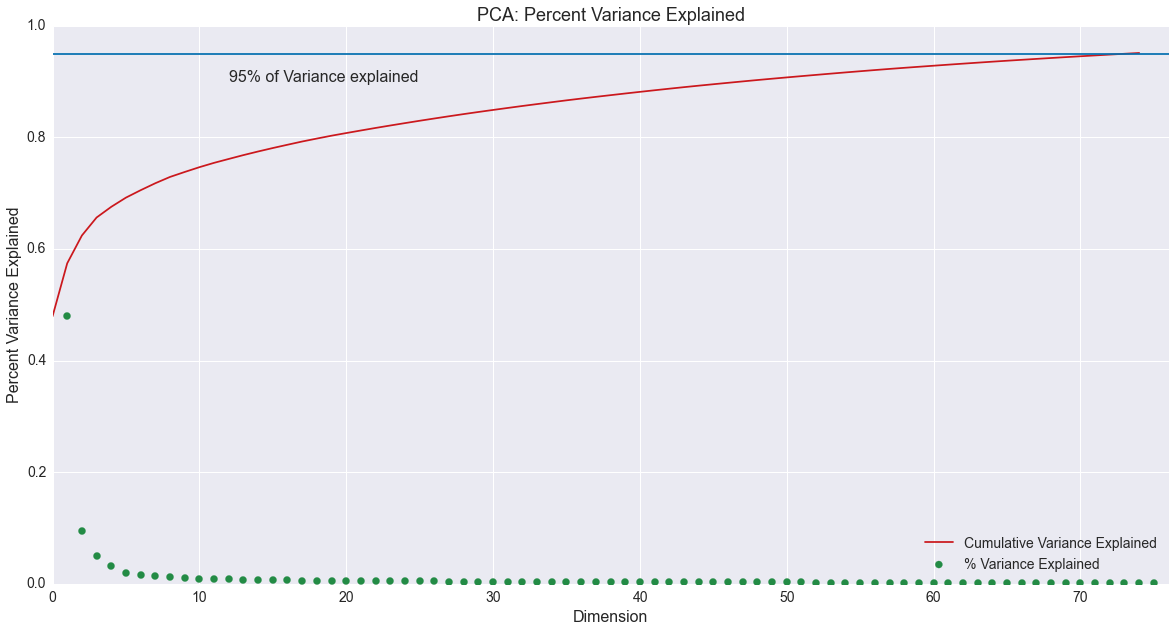

In [15]:
# Plot Variance Explained
plt.figure(figsize = (20, 10))
plt.scatter(range(1, pca.explained_variance_ratio_.shape[0]+1), pca.explained_variance_ratio_, s = 50, 
            color = '#238b45', label = '% Variance Explained')
plt.plot(np.cumsum(pca.explained_variance_ratio_), color = '#cb181d', label = 'Cumulative Variance Explained')
plt.xlabel("Dimension", fontsize = 16)
plt.ylabel("Percent Variance Explained", fontsize = 16)
plt.xlim(0, pca.explained_variance_ratio_.shape[0]+1)
plt.ylim(0,1)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(prop={'size': 14}, loc = 4)
plt.title('PCA: Percent Variance Explained', fontsize = 18)
# Plotting n = 75
plt.axhline(y = 0.95, color = '#0570b0')
plt.text(10 + 2, 0.9, '95% of Variance explained', fontsize = 16)
plt.show()

In [16]:
# Create a dataframe with 75 features labeled pc-1, pc-2...
pcdf = pd.DataFrame({'annual_y': temp['Annual_ResPPD_2013'], 'target_y': temp['Target_ResPPD_2013'], 'status': np.where(temp['Annual_ResPPD_2013'] > temp['Target_ResPPD_2013'], 'annual', 'target')})

# Populate the dataframe with PC's 
for i in range(pca.explained_variance_ratio_.shape[0]):
    pcdf['pc-%i' % (i+1)] = transform[:, i] 
    
pcdf.head(3)

,annual_y,status,target_y,pc-1,pc-2,pc-3,pc-4,pc-5,pc-6,pc-7,pc-8,pc-9,pc-10,pc-11,pc-12,pc-13,pc-14,pc-15,pc-16,pc-17,pc-18,pc-19,pc-20,pc-21,pc-22,pc-23,pc-24,pc-25,pc-26,pc-27,pc-28,pc-29,pc-30,pc-31,pc-32,pc-33,pc-34,pc-35,pc-36,pc-37,pc-38,pc-39,pc-40,pc-41,pc-42,pc-43,pc-44,pc-45,pc-46,pc-47,pc-48,pc-49,pc-50,pc-51,pc-52,pc-53,pc-54,pc-55,pc-56,pc-57,pc-58,pc-59,pc-60,pc-61,pc-62,pc-63,pc-64,pc-65,pc-66,pc-67,pc-68,pc-69,pc-70,pc-71,pc-72,pc-73,pc-74,pc-75
0,3.2,target,6.9,-2.549607,-8.438472,-1.663605,-1.880134,1.205229,-0.489368,-3.236818,0.110253,-0.121772,1.642961,-2.373496,-0.750987,-0.792898,0.577715,-1.690163,-0.221509,2.367939,1.272646,-0.027200,1.351070,2.138376,1.817744,0.536716,2.478345,-0.637551,0.023874,-0.161117,-0.425964,-0.535019,-0.635959,-0.476157,-2.049269,-2.173462,0.078445,-0.326803,0.820307,-0.206329,-0.105657,-0.220895,0.307809,1.259857,0.998945,0.331825,-0.970608,-0.563817,-1.792417,-0.301978,1.104286,-0.692686,0.408908,0.160113,0.163567,0.865931,1.398156,0.596918,-0.160391,0.726995,0.273838,0.850360,0.590573,0.655964,-0.354052,-0.731984,0.063630,-0.634605,-0.361773,-0.032703,-0.162384,-0.196240,0.568617,1.073111,-0.672748,0.233813,1.500309,0.069736
1,5.5,target,7.0,-3.367825,6.761664,1.429820,-1.349904,0.722954,-0.242198,0.453597,0.375178,0.264877,-0.825694,1.880898,0.115328,1.473926,0.870503,-1.732159,0.205192,-0.710211,-0.093944,-0.800070,0.965069,0.201747,-0.370724,-0.387753,1.161691,0.550610,0.228635,1.591885,-0.624842,0.850405,1.269993,-0.920820,-0.006298,1.259132,2.076642,-1.058644,0.406814,0.609116,-0.050492,0.385456,0.974059,0.220653,1.672689,-2.182680,0.522479,-0.633105,0.427415,-0.242274,0.682809,1.274199,0.362860,0.261584,0.476309,-0.826702,0.068538,0.007401,-0.501499,-0.221225,-0.758152,0.807596,0.250676,1.830462,1.994061,0.180216,0.089920,-0.411881,0.428357,-0.403790,-0.177725,-0.347237,0.519230,-0.426933,-0.348960,-0.938345,0.053015,-0.110500
2,2.6,target,5.5,0.305805,4.385684,-2.096701,0.537503,-1.367455,-0.722924,-0.423451,4.476393,-0.183449,-0.278877,-1.882692,0.021900,-0.128323,-0.216567,0.562037,0.534762,0.542317,-0.071753,1.174417,-0.662387,-1.625239,-0.517574,-0.034991,0.711316,-0.336647,0.315919,0.295727,-2.210315,0.611393,-1.116095,-0.142098,-0.642849,0.301657,0.969305,0.245136,1.433610,-0.237456,1.425559,0.090506,0.672015,0.639460,-0.430608,-0.671746,-0.220863,-0.929785,0.187828,-1.635030,0.498834,0.042559,0.883628,-0.978424,0.781123,0.283274,1.721562,1.830916,-0.738955,0.724157,-0.792868,0.724227,-0.530935,-0.001228,0.569108,1.443676,-0.455513,1.157500,-0.651051,-1.070878,-0.114557,0.212233,-0.509634,0.177074,-0.420285,-0.096861,-0.393751,-0.383514


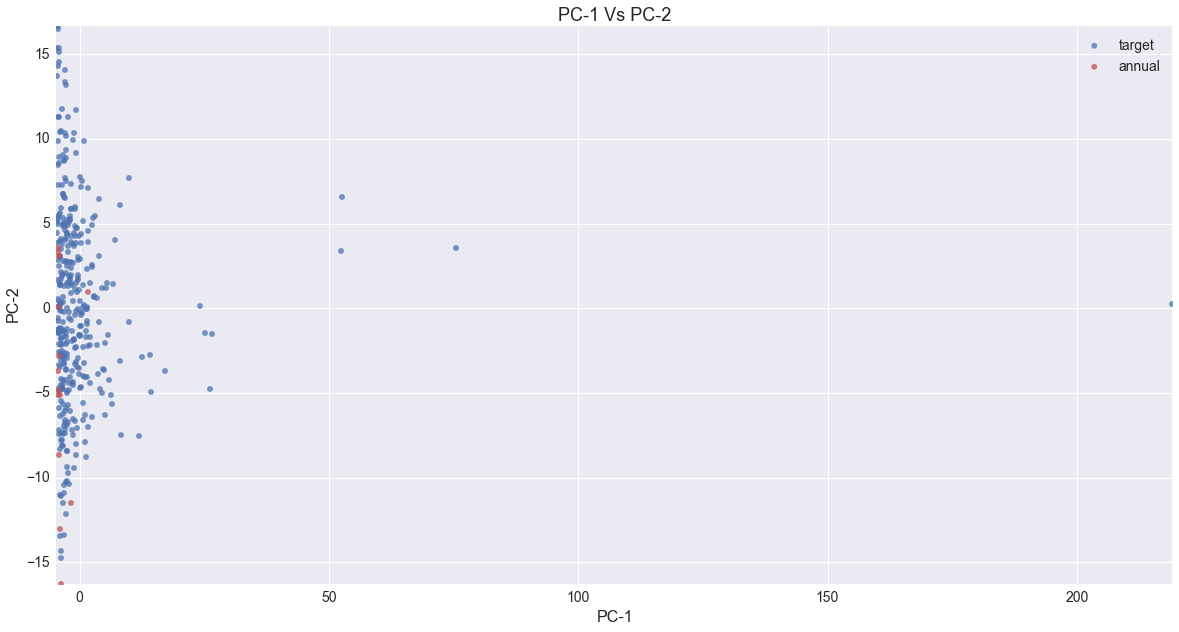

In [17]:
# Plotting PC-1 and PC-2
c0 = sns.color_palette()[0]
c1 = sns.color_palette()[2]
colors = [c0, c1]

plt.figure(figsize = (20, 10))
for status, color in zip(pcdf['status'].unique(), colors):
    # Filter df by status
    mask = pcdf['status'] == status
    plt.scatter(pcdf[mask]['pc-1'], pcdf[mask]['pc-2'], label = status, color = color, alpha = 0.75, s = 30)
    
plt.legend(prop={'size': 14}, loc = 1)
plt.xlabel("PC-1", fontsize = 16)
plt.ylabel("PC-2", fontsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.xlim(pcdf['pc-1'].min(), pcdf['pc-1'].max())
plt.ylim(pcdf['pc-2'].min(),pcdf['pc-2'].max())
plt.title('PC-1 Vs PC-2', fontsize = 18)

## Singular Value Decomposition (SVD)

- Method for transforming correlated variables into a set of uncorrelated variables that better explain the various relationships among the original data
- Method for identifying and ordering the dimensions along which data points exihibit the most variation
- Dimensionality reduction - Best approximation of the original data using fewer dimensions

Theorem: A rectangular matrix X can be broken down into the product of three matrices - an orthogonal matrix U, a diagonal matrix D, and transpose of an orthogonal matrix V. (Orthogonal - 0 correlation between columns or columns are independent of each other)

Suppose a data matrix X has $N$ observations (rows) and $p$ columns. 

Matrix X can be written as:

$$X = U D V^\top , \mbox{ with } $$

* $U$ is $N\times p$ with  $U^\top U=I$ and $U$ are the left singular vectors
* $V$ is $p\times p$ with $V^\top V=I$ and $V$ are the right singular vectors - PCA loadings
* $D$ is $p \times p$ diagonal matrix and $D$ are the singular values
* $UD$ gives PCA scores

Changing basis: $XV = UD$ 

And changing back $XVV^\top = X$

---
[A good and easy to understand SVD tutorial](https://www.ling.ohio-state.edu/~kbaker/pubs/Singular_Value_Decomposition_Tutorial.pdf)

In [18]:
# module for performing linear algebra operations for SVD
import numpy.linalg as lin 

In [19]:
# X
X = x_std
print X.shape

(378, 368)


In [20]:
# Perform SVD
U, D, V = np.linalg.svd(X) # U, D, V = scipy.lianalg.svd(X, full_matrices = False)
print U.shape
print D.shape
print V.shape

(378, 378)
(368,)
(368, 368)


$D^2 \propto$ variance explained by the dimension. For variance explained, normalize $D^2$

In [21]:
var_exp = D**2/sum(D**2)
print 'The first component explains %0.2f%% of the variance' % (var_exp[0] * 100)
print 'The second component explains %0.2f%% of the variance' % (var_exp[1] * 100)

The first component explains 47.93% of the variance
The second component explains 9.51% of the variance


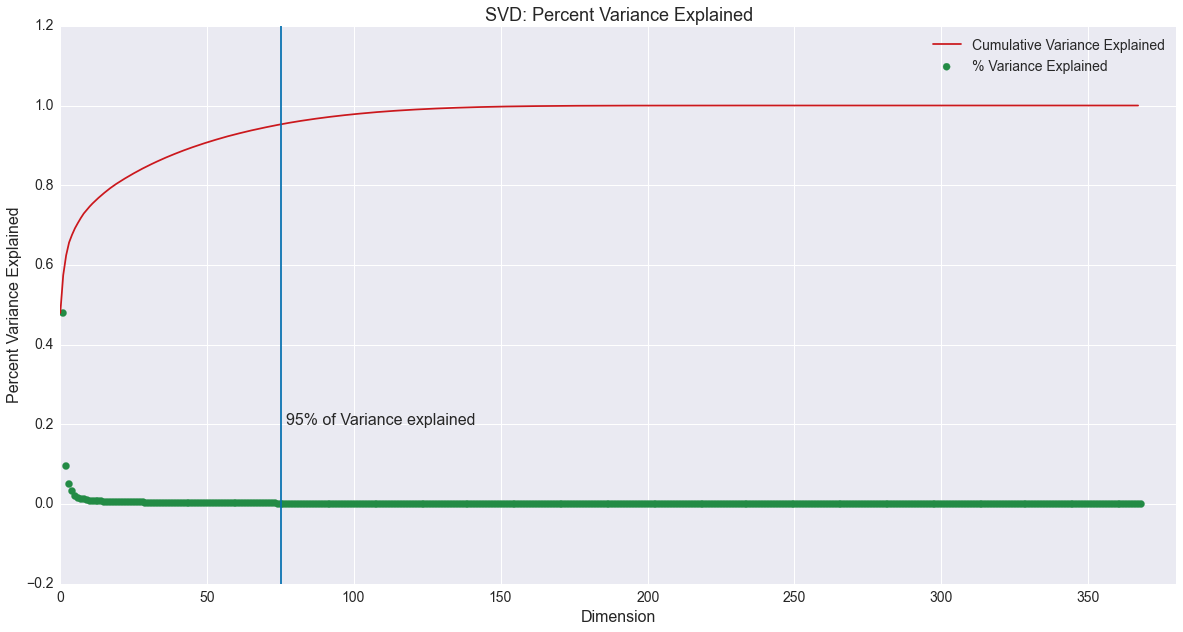

In [22]:
# Plot Variance Explained
plt.figure(figsize = (20, 10))
plt.scatter(range(1, len(D)+1), D**2/np.sum(D**2), s = 50, color = '#238b45', label = '% Variance Explained')
plt.plot(np.cumsum(D**2/np.sum(D**2)), color = '#cb181d', label = 'Cumulative Variance Explained')
plt.xlabel("Dimension", fontsize = 16)
plt.ylabel("Percent Variance Explained", fontsize = 16)
plt.xlim(0, 380)
#plt.ylim(0,0.5)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(prop={'size': 14})
plt.title('SVD: Percent Variance Explained', fontsize = 18)
# Plotting n = 75
plt.axvline(x = 75, color = '#0570b0')
plt.text(75 + 2, 0.2, '95% of Variance explained', fontsize = 16)
plt.show()

## Min-Max Scaling (Normalization)

- In this approach, the data is scaled to a fixed range - usually $0$ to $1$. The cost of having this bounded range is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

$$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

- PCA - Use *standardization or z-score normalization* because we are interested in the components that maximize the variance  
- Neural Network Algorithm - Requires scaled data in range 0 to 1.

## Linear Discriminant Analysis


![pcaVslda](images/ldaVspca.png)

**PCA Vs LDA** - Both PCA and LDA are linear transformation methods. PCA yields the directions of principal components that maximize the variance of the data, whereas LDA finds the directions that maximize the separation (or discrimination) between different classes.

Ref: [LDA article](http://sebastianraschka.com/Articles/2014_python_lda.html)

In [23]:
# Y
y_cols = temp.columns.tolist()[3:5]
print y_cols
y = temp[y_cols]
# Create a new feature 'Residential PPD Rate Difference'
y['Res_Diff'] = y['Target_ResPPD_2013'] - y['Annual_ResPPD_2013']
del y['Target_ResPPD_2013']
del y['Annual_ResPPD_2013']

['Target_ResPPD_2013', 'Annual_ResPPD_2013']


In [24]:
y.describe()

,Res_Diff
count,378.000000
mean,22.621958
std,362.730364
min,-1.900000
25%,1.400000
50%,2.400000
75%,3.600000
max,7052.800000


In [25]:
# Bin Res PPD Difference based on 25th, 50th, and 75th percentiles.
bins = [0, 1.4, 2.4, 3.6] 
labels = [1, 2, 3, 4]
recommendations = ['High', 'Medium', 'Low', 'Very Low']
y['label'] = 0 # Create a column to populate (initially filled with 0)
y['recommend'] = 'Very High'

for i in range(y.shape[0]):
    for j in labels:
        if y.ix[i, 'Res_Diff'] >= bins[j-1]:
            y.ix[i, 'label'] = j
            y.ix[i, 'recommend'] = recommendations[j-1]
            
group = y.groupby(['label'])[['Res_Diff']].count()
group.reset_index()

/Applications/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:389: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  self.obj[item] = s


,label,Res_Diff
0,0,14
1,1,84
2,2,80
3,3,107
4,4,93


In [26]:
Y = y['label']

In [27]:
# LDA
from sklearn.lda import LDA
lda = LDA(n_components = 75)

In [28]:
x_lda = lda.fit_transform(x_std, Y)

# Getting warning: "Variables are collinear" - This means predictors are correlated

/Applications/anaconda/lib/python2.7/site-packages/sklearn/lda.py:161: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [29]:
# Create a dataframe with 75 features labeled ld-1, ld-2...
lddf = pd.DataFrame({'label': Y, 'recommendation': y['recommend']})

# Populate the dataframe with LD's 
for i in range(x_lda.shape[1]):
    lddf['ld-%i' % (i+1)] = x_lda[:, i] 
    
lddf.head(3)

,label,recommendation,ld-1,ld-2,ld-3,ld-4
0,4,Very Low,1.416149,6.095069,0.549868,-1.999592
1,2,Medium,-1.735876,0.016692,0.975311,5.731635
2,3,Low,1.421200,-4.285389,-3.892131,-2.161925


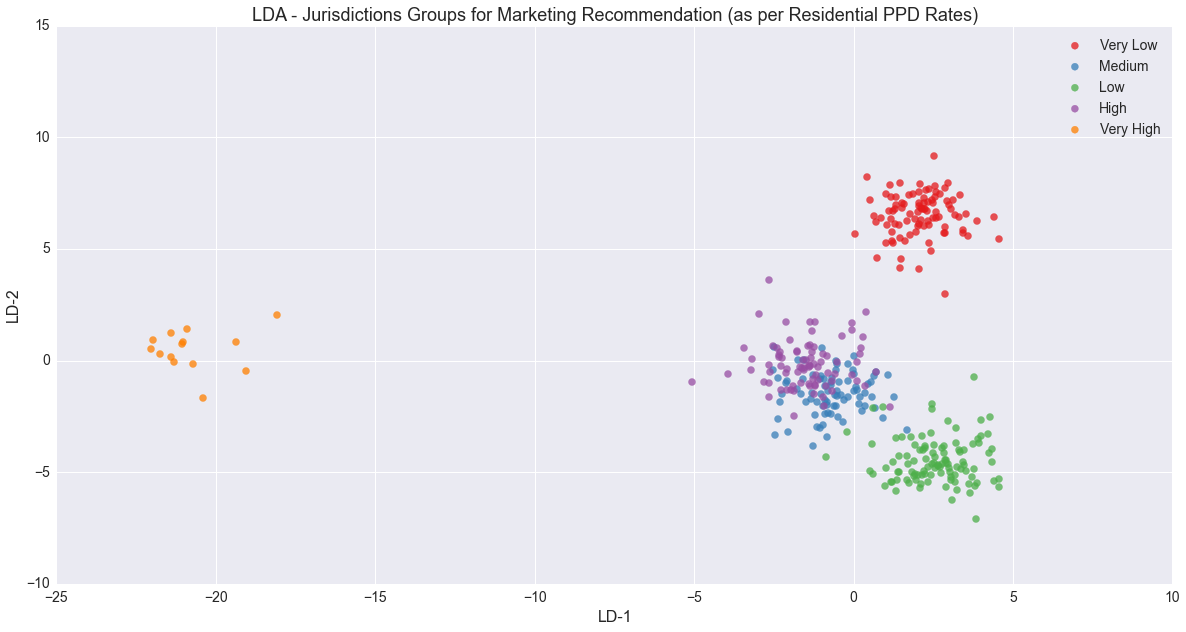

In [30]:
# Plotting LD-1 and LD-2

# Set color
hue = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']

c0 = sns.color_palette(hue)[0]
c1 = sns.color_palette(hue)[1]
c2 = sns.color_palette(hue)[2]
c3 = sns.color_palette(hue)[3]
c4 = sns.color_palette(hue)[4]

colors = [c0, c1, c2, c3, c4]

plt.figure(figsize = (20, 10))
for label, color in zip(lddf['recommendation'].unique(), colors):
    # Filter df by status
    mask = lddf['recommendation'] == label
    plt.scatter(lddf[mask]['ld-1'], lddf[mask]['ld-2'], label = label, color = color, alpha = 0.75, s = 50)

    plt.xlabel("LD-1", fontsize = 16)
    plt.ylabel("LD-2", fontsize = 16)    
    plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
    plt.legend(prop={'size': 14})
    plt.title('LDA - Jurisdictions Groups for Marketing Recommendation (as per Residential PPD Rates)', fontsize = 18)

## Classifying in a reduced feature space with k-NN

- PCA is unsupervised (only the variation in the $n$ dimensional feature space is explained). The variation in the $y$ is  not explained. 
- Select Principal Components to make classifier
- *Euclidean Distance*

$$D(s_1, s_2) = \sum_f (x_{f1} - x_{f2})^2$$

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

In [32]:
# Numpy Array of Y's and X's
ys = y['label'].values 
# Sub dataframe of PC's
subdf = pcdf[['pc-1', 'pc-2']]
# Standardize sub dataframe of PC's
subdf_std = (subdf - subdf.mean(axis = 0))/subdf.std(axis = 0)
xs = subdf_std.values

Enter k value (int)5
Accuracy on training set: 0.52
Accuracy on testing set: 0.25
[3 2 1 3 3 1 2 1 2 1 2 1 3 3 4 3 1 3 1 4 2 1 4 3 1 1 4 2 1 1 3 2 1 2 2 4 2
 3 3 4 4 3 3 0 2 4 3 1 2 2 3 3 2 4 4 4 3 0 2 4 4 4 3 2 4 4 4 1 2 3 2 4 4 1
 1 1 0 4 3 1 3 1 4 1 3 1 4 3 1 3 2 4 1 1 1 3 4 2 1 2 3 4 4 2 3 2 3 3 2 2 4
 3 4 4 4 2 4 4 3 2 2 2 2 4 0 4 4 4 1 3 2 3 2 2 1 4 3 2 4 2 2 1 1 3 3 2 3 3
 2 4 3 4 3 2 2 3 3 3 1 2 2 1 4 3 1 3 4 3 4 3 2 3 4 0 2 3 1 1 3 4 4 4 3 3 3
 2 4 3 3 2 3 2 2 3 3 2 2 1 2 3 1 4 4 4 1 2 1 4 2 3 3 3 1 3 4 2 4 1 2 2 3 4
 4 4 2 4]


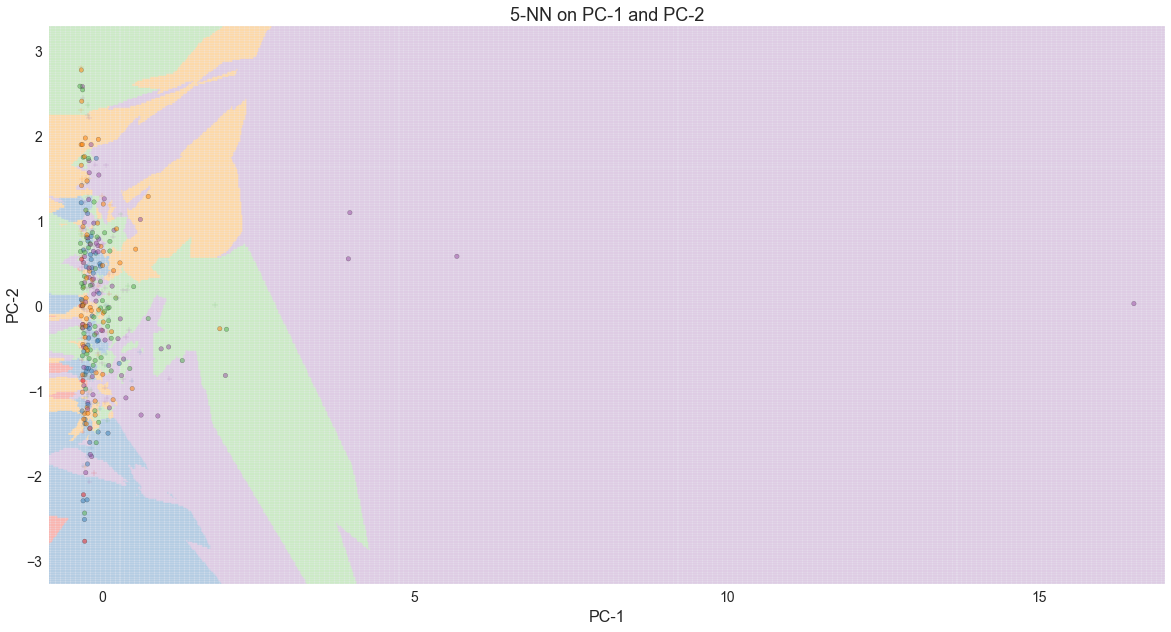

In [33]:
from matplotlib.colors import ListedColormap

# Generate Colormap object from a list of colors: Colorbrewer
cmap_light = ListedColormap(['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6'])
cmap_dark = ListedColormap(['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00'])

# Split data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(xs, ys, train_size = 0.6)

k = int(raw_input("Enter k value (int)"))

clf = KNeighborsClassifier(k)
clf = clf.fit(X_train, Y_train)

training_accuracy = clf.score(X_train, Y_train)
testing_accuracy = clf.score(X_test, Y_test)
print 'Accuracy on training set: %0.2f' % (training_accuracy)
print 'Accuracy on testing set: %0.2f' % (testing_accuracy)

plt.figure(figsize=(20,10))
ax = plt.gca()

# Concatenate X_train and X_test
X = np.concatenate((X_train, X_test))


### Mesh Plotting ###
# Step size of the mesh
h = 0.02 # Point in the mesh [x_min, x_max] x [y_min, y_max]
# Get min and max values for mesh
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels (z's) for each point in mesh. Use last trained model
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # np.c_ - stacks 2d arrays by columns, np.ravel() - returns a flattened array
zz = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, zz, cmap = cmap_light, alpha = 0.5, axes = ax)


show_train = Y_train
show_test = Y_test   

print show_train
# Plot Training Points
ax.scatter(X_train[:, 0], X_train[:, 1], c = show_train-1, cmap = cmap_dark, s = 20, alpha = 0.5)
# Plot Testing Points
ax.scatter(X_test[:, 0], X_test[:, 1], c = show_test-1, cmap = cmap_dark, s = 30, alpha = 0.5, marker = '+')
    
# Set xx and yy limits
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax.set_xlabel("PC-1", fontsize = 16)
ax.set_ylabel("PC-2", fontsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.title(str(k) + '-NN on PC-1 and PC-2', fontsize = 18)

In [34]:
# Another way of calculating recommendation labels or Y's
y_cols = temp.columns.tolist()[3:7]
print y_cols
new_y = temp[y_cols]
# Create a new feature 'Residential PPD Rate Difference'
new_y['Res_Diff'] = new_y['Target_ResPPD_2013'] - new_y['Annual_ResPPD_2013']
new_y['Emp_Diff'] = new_y['Target_EmpPPD_2013'] - new_y['Annual_EmpPPD_2013']
new_y['Mean_Diff'] = (new_y['Res_Diff'] + new_y['Emp_Diff'])/2.0

del new_y['Target_ResPPD_2013']
del new_y['Annual_ResPPD_2013']
del new_y['Target_EmpPPD_2013']
del new_y['Annual_EmpPPD_2013']

new_y.describe()

['Target_ResPPD_2013', 'Annual_ResPPD_2013', 'Target_EmpPPD_2013', 'Annual_EmpPPD_2013']


,Res_Diff,Emp_Diff,Mean_Diff
count,378.000000,378.000000,378.00000
mean,22.621958,9.878042,16.25000
std,362.730364,22.731523,181.77288
min,-1.900000,-9.900000,-5.75000
25%,1.400000,3.600000,2.76250
50%,2.400000,6.800000,4.60000
75%,3.600000,11.475000,7.88750
max,7052.800000,404.600000,3531.70000


In [35]:
# Bin Mean PPD Difference based on 25th, 50th, and 75th percentiles.
bins = [0, 2.76, 4.6, 7.88] 
labels = [1, 2, 3, 4]
recommendations = ['High', 'Medium', 'Low', 'Very Low']
new_y['label'] = 0 # Create a column to populate (initially filled with 0)
new_y['recommend'] = 'Very High'

for i in range(new_y.shape[0]):
    for j in labels:
        if new_y.ix[i, 'Mean_Diff'] >= bins[j-1]:
            new_y.ix[i, 'label'] = j
            new_y.ix[i, 'recommend'] = recommendations[j-1]
            
group = new_y.groupby(['label'])[['Res_Diff']].count()
group.reset_index()

,label,Res_Diff
0,0,18
1,1,77
2,2,84
3,3,104
4,4,95


In [36]:
# Quadratic Discriminant Analysis
from sklearn.qda import QDA
clf = QDA()
clf.fit(x_std, Y)

/Applications/anaconda/lib/python2.7/site-packages/sklearn/qda.py:124: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA(priors=None, reg_param=0.0)

## K-means Clustering (75 PC's)

In [37]:
from sklearn.cluster import KMeans

# Select PC's 
pcs = pcdf.columns.tolist()[3:]
# Get values (numpy array)
x_km = pcdf[pcs].values

In [38]:
k = int(raw_input('Enter the value of k: '))
k_means = KMeans(n_clusters = k)
k_means.fit(x_km)
labels = pd.DataFrame({'labels': k_means.labels_})
labels['Res_Diff'] = new_y['Res_Diff']
labels['Emp_Diff'] = new_y['Emp_Diff']
labels.groupby(['labels'])[['Res_Diff', 'Emp_Diff']].count().reset_index()

Enter the value of k: 5


,labels,Res_Diff,Emp_Diff
0,0,7,7
1,1,160,160
2,2,196,196
3,3,1,1
4,4,14,14


### K-means Clustring (Iris Data) Example

In [39]:
from sklearn.cluster import KMeans
from sklearn import datasets

iris = datasets.load_iris()
x_iris = iris.data
y_iris = iris.target
k_means = KMeans(n_clusters = 3)
k_means.fit(x_iris)
print k_means.labels_[::10]
print y_iris[::10]

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


**Notes <font color = red>Do not delete this cell</font>:**

Ankoor:
- Check how target rate/annual rate is defined/calculated
- Model Y as a continuous response 
- Economic data can be aggregated to a single number, i.e come up with an index
- Racial data - aggregate it - Racial diversity index or something mixed in with some other covariates
- Income index - Categorical - E[x] based on prob dist of income 
- Crime index - Come up with an index
- Solar index - Come up with an index
- Reducing PC's even further
- Look at distribution of features after PCA 
- Education Index - compute pdf and assign expecation value based on population 
- Pick representative value (mean value/median value) for travel time columns 
- Each jurisdiction you have fraction - measure as a function of time (no of hours after 12 am) * fraction of users/sum
- 5 and 5:29, assume mean is 5:15...
- Log transforming (smoothing out curve) does not change much because in clustering values are z-score normalized

---
1. What are the deliverable? Need to talk to Jeff!
2. Jurisdiction under/over performing - Identify which one has the most potential
3. Identifying which recyling programs have impact on recycling
4. Clustering of Jurisdiction without PCA (5-6 features) - Idistribution of recycling rates for those clusters - find mean.
5. Lot of feature engineering is left - else there will be overfitting 
6. Focus attention to features that are relevant or more meaningful
7. FEATURE ENGINEERING!!! - Most important 
8. Feature if the values are very close then (Error bars, if for a given field if all jusridiction have same value...). Ex. Fraction of population that is male, we know it is 50% is male
---
JR on Info to be a good Data Scientist
- Databases
- SQL
- Bayesian
- Time Series Analysis
- Sentiment Analysis - NLTK/Scikit-learn